In [1]:
# !pip install pytrends
# !pip install pandas==0.25

import numpy as np
import pandas as pd
from pytrends.request import TrendReq
from matplotlib import pyplot as plt

# passager de transport aérien

In [2]:
df = pd.read_csv('airline_passengers.csv', parse_dates = ['Month'], index_col = ['Month'])
 
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


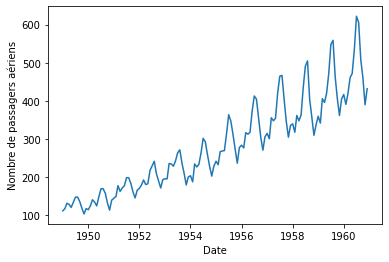

In [3]:
plt.xlabel('Date')
plt.ylabel('Nombre de passagers aériens')
plt.plot(df)

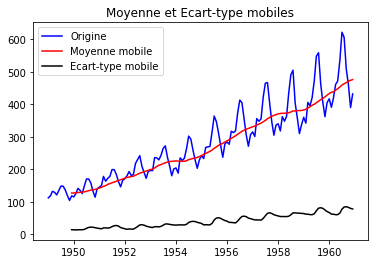

In [4]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()

plt.plot(df, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

# google trend avec le terme macron

In [5]:
pytrend = TrendReq()

In [6]:
pytrend.build_payload(kw_list=['macron'])

interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

            macron  isPartial
date                         
2015-03-22       1      False
2015-03-29       1      False
2015-04-05       1      False
2015-04-12       0      False
2015-04-19       1      False


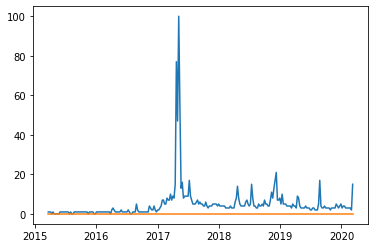

In [7]:
plt.plot(interest_over_time_df)

# avec chocolat

In [8]:
pytrend.build_payload(kw_list=['chocolat'])

interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

            chocolat  isPartial
date                           
2015-03-22        55      False
2015-03-29        70      False
2015-04-05        51      False
2015-04-12        40      False
2015-04-19        40      False


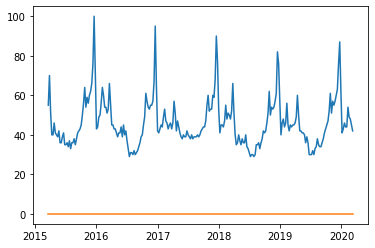

In [9]:
plt.plot(interest_over_time_df)

# reprise 1

## detrender et desaisonaliser

In [17]:
# !pip install statsmodels
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

series = df
result = seasonal_decompose(series, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64
Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64
Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64
Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01  

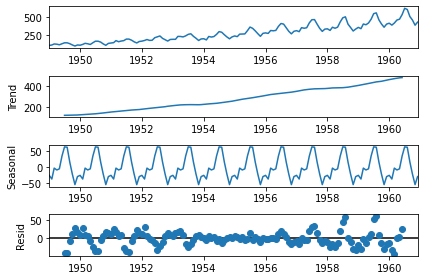

In [19]:
result.plot()
plt.show()

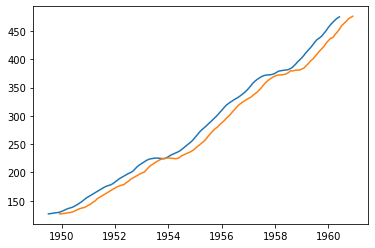

In [24]:
plt.plot(result.trend)
plt.plot(rolling_mean)
plt.show()